# NAME-PAPU SWAIN

PROJECT-Movielens Case Study

DOMAIN-ENTERTAINMENT

OBJECTIVE-The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. Members of the GroupLens Research Project are involved in many research projects related to the fields of information filtering, collaborative filtering, and recommender systems. The project is led by professors John Riedl and Joseph Konstan. The project began to explore automated collaborative filtering in 1992 but is most well known for its worldwide trial of an automated collaborative filtering system for Usenet news in 1996. Since then the project has expanded its scope to research overall information by filtering solutions, integrating into content-based methods, as well as, improving current collaborative filtering technology.

I want to perform the analysis using the Exploratory Data Analysis technique and need to find features affecting the ratings of any particular movie and build a model to predict the movie ratings.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Import ratings.dat dataset

parse_dates=["Timestamp"] for converting into datetime datatype

In [2]:
ratings_header="UserID::MovieID::Rating::Timestamp".split("::")
ratings=pd.read_csv("ratings.dat",sep="::",names=ratings_header,parse_dates=["Timestamp"])

In [3]:
ratings_header

['UserID', 'MovieID', 'Rating', 'Timestamp']

In [4]:
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


Import users.dat dataset

In [5]:
users_header="UserID::Gender::Age::Occupation::Zip-code".split("::")
users=pd.read_csv("users.dat",sep="::",names=users_header)

In [6]:
users_header

['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code']

In [7]:
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


Import movies.dat dataset

encoding=("ISO-8859-1") for converting into UTF-8 

In [8]:
movies_header="MovieID::Title::Genres".split("::")
movies=pd.read_csv("movies.dat",encoding=("ISO-8859-1"),sep="::",names=movies_header)

In [9]:
movies_header

['MovieID', 'Title', 'Genres']

In [10]:
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


Create a new dataset [Master_Data]

In [11]:
ratings_and_users=pd.merge(ratings,users,on="UserID")

In [12]:
ratings_and_users.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,1193,5,978300760,F,1,10,48067
1,1,661,3,978302109,F,1,10,48067
2,1,914,3,978301968,F,1,10,48067
3,1,3408,4,978300275,F,1,10,48067
4,1,2355,5,978824291,F,1,10,48067


In [13]:
master_data=pd.merge(ratings_and_users,movies,on="MovieID")

In [14]:
master_data.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [15]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   UserID      1000209 non-null  int64 
 1   MovieID     1000209 non-null  int64 
 2   Rating      1000209 non-null  int64 
 3   Timestamp   1000209 non-null  int64 
 4   Gender      1000209 non-null  object
 5   Age         1000209 non-null  int64 
 6   Occupation  1000209 non-null  int64 
 7   Zip-code    1000209 non-null  object
 8   Title       1000209 non-null  object
 9   Genres      1000209 non-null  object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


In [16]:
master_data.isna().sum()

UserID        0
MovieID       0
Rating        0
Timestamp     0
Gender        0
Age           0
Occupation    0
Zip-code      0
Title         0
Genres        0
dtype: int64

In [17]:
master_data.describe().T

,count,mean,std,min,25%,50%,75%,max
UserID,1000209.0,3.024512e+03,1.728413e+03,1.0,1506.0,3070.0,4476.0,6.040000e+03
MovieID,1000209.0,1.865540e+03,1.096041e+03,1.0,1030.0,1835.0,2770.0,3.952000e+03
Rating,1000209.0,3.581564e+00,1.117102e+00,1.0,3.0,4.0,4.0,5.000000e+00
Timestamp,1000209.0,9.722437e+08,1.215256e+07,956703932.0,965302637.0,973018006.0,975220939.0,1.046455e+09
Age,1000209.0,2.973831e+01,1.175198e+01,1.0,25.0,25.0,35.0,5.600000e+01
Occupation,1000209.0,8.036138e+00,6.531336e+00,0.0,2.0,7.0,14.0,2.000000e+01


User Age Distribution

Text(0.5, 1.0, 'User age distribution')

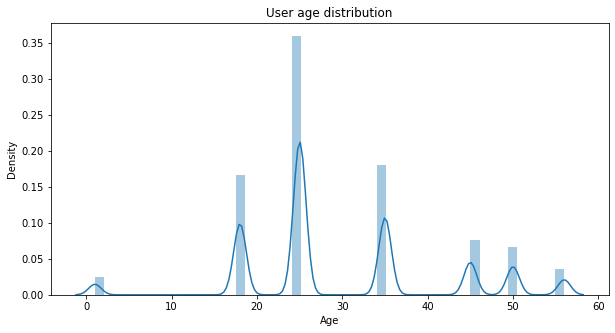

In [18]:
plt.figure(figsize=(10,5))
sns.distplot(master_data["Age"])
plt.title("User age distribution")

Text(0.5, 1.0, 'User age distribution')

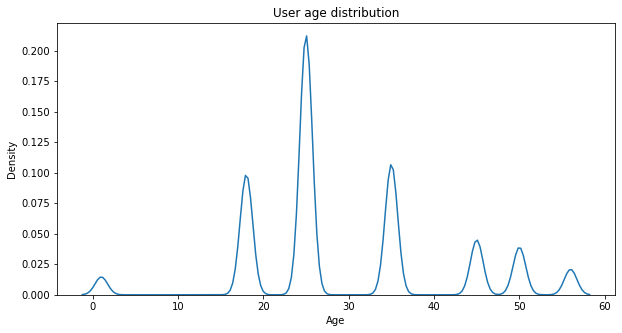

In [19]:
plt.figure(figsize=(10,5))
sns.distplot(master_data["Age"],hist=False)
plt.title("User age distribution")

#### From the above user age distribution,i concluded that between 20-30 age group watches movies more.

User rating of the movie “Toy Story”

In [20]:
master_data[master_data["Title"].str.contains("Toy Story",case=False)]

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
41626,1,1,5,978824268,F,1,10,48067,Toy Story (1995),Animation|Children's|Comedy
41627,6,1,4,978237008,F,50,9,55117,Toy Story (1995),Animation|Children's|Comedy
41628,8,1,4,978233496,M,25,12,11413,Toy Story (1995),Animation|Children's|Comedy
41629,9,1,5,978225952,M,25,17,61614,Toy Story (1995),Animation|Children's|Comedy
41630,10,1,5,978226474,F,35,1,95370,Toy Story (1995),Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...
56826,6022,3114,5,956755741,M,25,17,57006,Toy Story 2 (1999),Animation|Children's|Comedy
56827,6024,3114,4,956749447,M,25,12,53705,Toy Story 2 (1999),Animation|Children's|Comedy
56828,6027,3114,4,956726766,M,18,4,20742,Toy Story 2 (1999),Animation|Children's|Comedy
56829,6036,3114,4,956710231,F,25,15,32603,Toy Story 2 (1999),Animation|Children's|Comedy


In [21]:
master_data_1=master_data[master_data["Title"].str.contains("Toy Story",case=False)]["Rating"].value_counts()
master_data_1

5    1544
4    1413
3     559
2     105
1      41
Name: Rating, dtype: int64

Text(0.5, 1.0, 'User rating of the movie Toy Story')

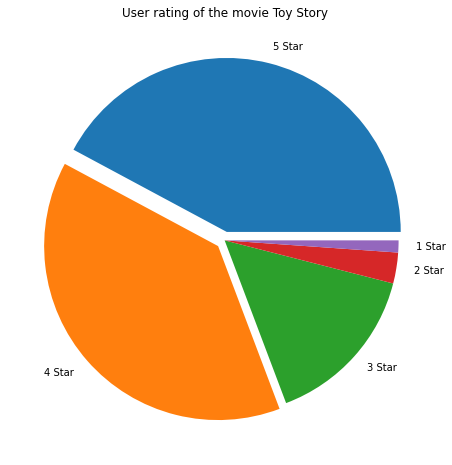

In [22]:
plt.figure(figsize=(15,8))
plt.pie(master_data_1,explode=(0.05,0.05,0,0,0),labels=("5 Star" ,"4 Star","3 Star","2 Star","1 Star"))
plt.title("User rating of the movie Toy Story")

#### Movie “Toy Story” has got maximum 4 star and 5 star ratings from audience.

Top 25 movies by viewership rating

In [23]:
master_data_2=master_data.groupby(["Title"])["Rating"].sum().sort_values(ascending=False)[:25]
master_data_2

Title
American Beauty (1999)                                   14800
Star Wars: Episode IV - A New Hope (1977)                13321
Star Wars: Episode V - The Empire Strikes Back (1980)    12836
Star Wars: Episode VI - Return of the Jedi (1983)        11598
Saving Private Ryan (1998)                               11507
Raiders of the Lost Ark (1981)                           11257
Silence of the Lambs, The (1991)                         11219
Matrix, The (1999)                                       11178
Sixth Sense, The (1999)                                  10835
Terminator 2: Judgment Day (1991)                        10751
Fargo (1996)                                             10692
Schindler's List (1993)                                  10392
Braveheart (1995)                                        10346
Back to the Future (1985)                                10307
Shawshank Redemption, The (1994)                         10143
Godfather, The (1972)                            

Text(0.5, 1.0, 'Top 25 Movies by Viwership Ratings')

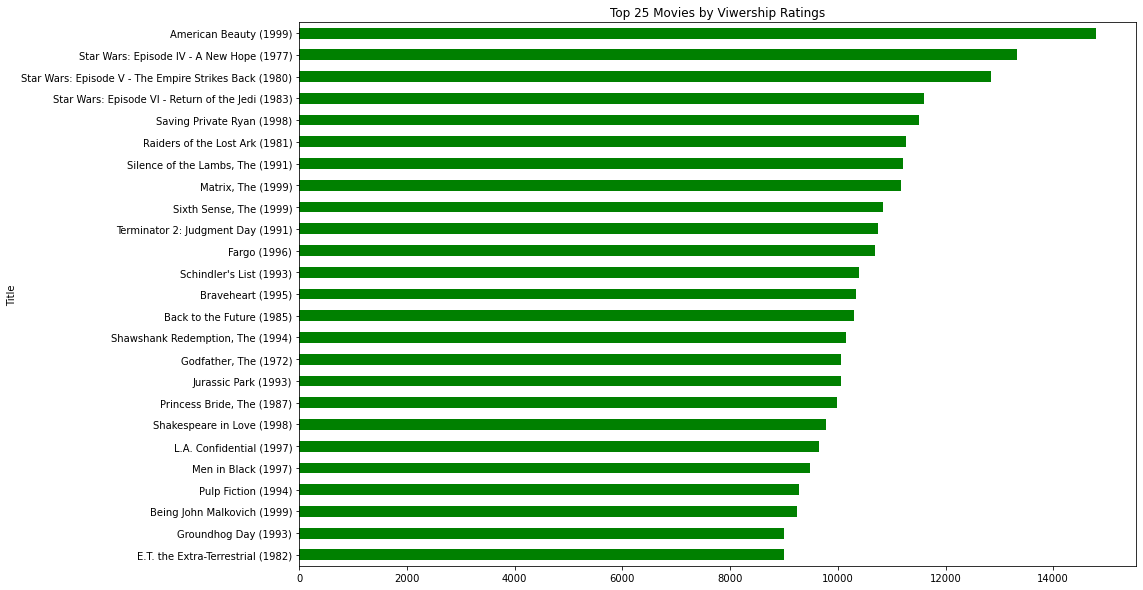

In [24]:
master_data_2.sort_values().plot(kind="barh",figsize=(15,10),color="green")
plt.title("Top 25 Movies by Viwership Ratings")

#### The above are Top 25 movies by viewership rating.

Find the ratings for all the movies reviewed by for a particular user of user id = 2696

In [25]:
master_data_3=master_data[master_data["UserID"]==2696]
master_data_3

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
24345,2696,1270,2,973308676,M,25,7,24210,Back to the Future (1985),Comedy|Sci-Fi
29848,2696,1097,3,973308690,M,25,7,24210,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi
244232,2696,1617,4,973308842,M,25,7,24210,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller
250014,2696,800,5,973308842,M,25,7,24210,Lone Star (1996),Drama|Mystery
273633,2696,3386,1,973308842,M,25,7,24210,JFK (1991),Drama|Mystery
277808,2696,3176,4,973308865,M,25,7,24210,"Talented Mr. Ripley, The (1999)",Drama|Mystery|Thriller
371178,2696,1711,4,973308904,M,25,7,24210,Midnight in the Garden of Good and Evil (1997),Comedy|Crime|Drama|Mystery
377250,2696,1589,3,973308865,M,25,7,24210,Cop Land (1997),Crime|Drama|Mystery
598042,2696,1783,4,973308865,M,25,7,24210,Palmetto (1998),Film-Noir|Mystery|Thriller
603189,2696,1892,4,973308904,M,25,7,24210,"Perfect Murder, A (1998)",Mystery|Thriller


In [26]:
master_data_4=master_data_3[["Rating","Title"]]
master_data_4

,Rating,Title
24345,2,Back to the Future (1985)
29848,3,E.T. the Extra-Terrestrial (1982)
244232,4,L.A. Confidential (1997)
250014,5,Lone Star (1996)
273633,1,JFK (1991)
277808,4,"Talented Mr. Ripley, The (1999)"
371178,4,Midnight in the Garden of Good and Evil (1997)
377250,3,Cop Land (1997)
598042,4,Palmetto (1998)
603189,4,"Perfect Murder, A (1998)"


Text(0.5, 1.0, ' Ratings for all the movies reviewed by user id = 2696')

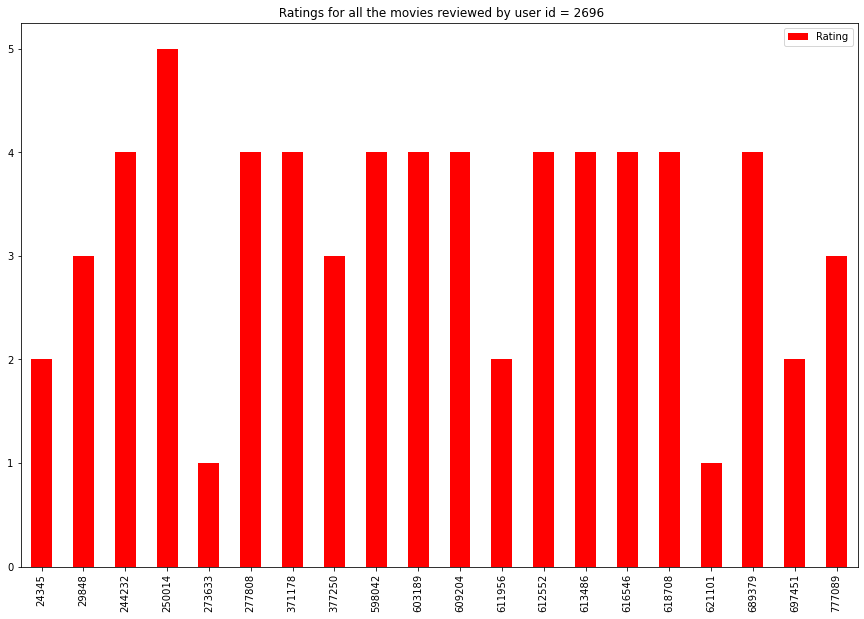

In [27]:
master_data_4.plot(kind="bar",figsize=(15,10),color="red")
plt.title(" Ratings for all the movies reviewed by user id = 2696")

#### Ratings for all the movies reviewed by for user of user id = 2696

Text(0.5, 1.0, 'Movie ratings')

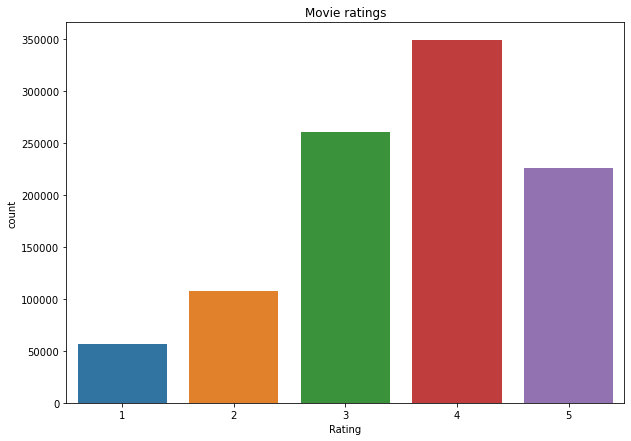

In [28]:
plt.figure(figsize=(10,7))
sns.countplot(data=master_data,x="Rating")
plt.title("Movie ratings")

#### Most of the movies got 4 star rating.

<AxesSubplot:xlabel='Age', ylabel='count'>

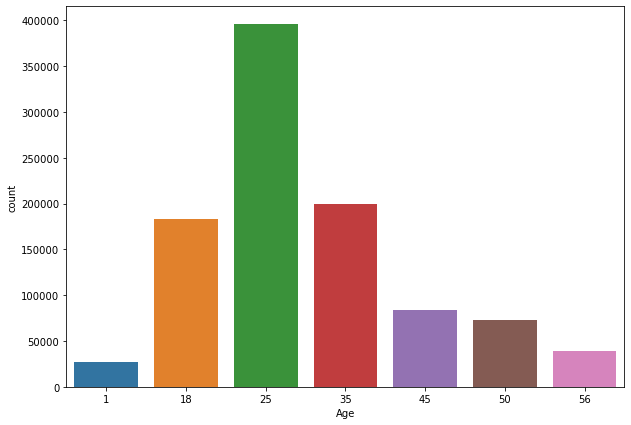

In [29]:
plt.figure(figsize=(10,7))
sns.countplot(data=master_data,x="Age")

#### 25-34 age group has maximum movie users.

<AxesSubplot:xlabel='Gender', ylabel='count'>

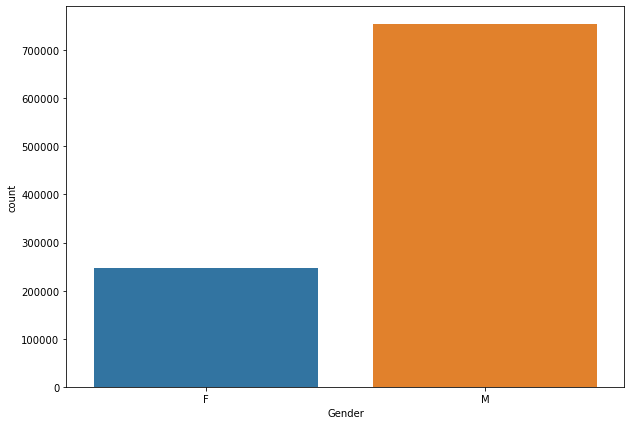

In [30]:
plt.figure(figsize=(10,7))
sns.countplot(data=master_data,x="Gender")

#### Male has higher viewers than Female.

<AxesSubplot:xlabel='Occupation', ylabel='Count'>

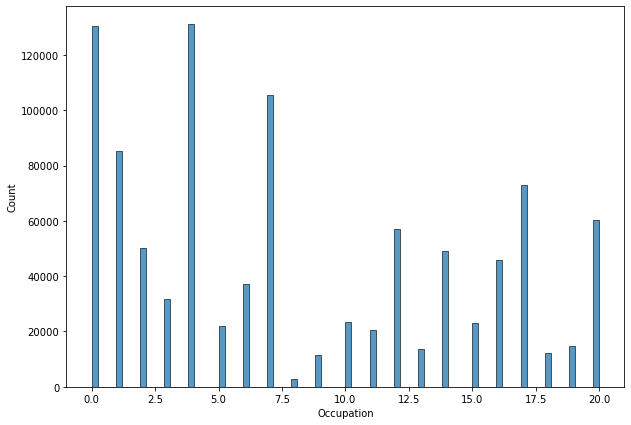

In [31]:
plt.figure(figsize=(10,7))
sns.histplot(data=master_data,x="Occupation")

#### "academic/educator","clerical/admin","college/grad student" and "other" or not specified have more users.

### Feature Engineering

In [32]:
master_data[["Genres"]]

,Genres
0,Drama
1,Drama
2,Drama
3,Drama
4,Drama
...,...
1000204,Documentary
1000205,Drama
1000206,Drama
1000207,Comedy|Drama|Western


In [33]:
Genre=[]

In [34]:
for i in master_data["Genres"]:
    temp=i.split("|")
    Genre.extend(temp)

In [35]:
Unique_Genre=list(set(Genre))

In [36]:
Unique_Genre

['Sci-Fi',
 'War',
 'Film-Noir',
 'Horror',
 'Western',
 'Animation',
 'Comedy',
 'Drama',
 'Crime',
 'Documentary',
 'Fantasy',
 "Children's",
 'Action',
 'Musical',
 'Adventure',
 'Thriller',
 'Romance',
 'Mystery']

### Above all are the unique genres.

Multiply by 1(*1) gives 0 or 1 else it will give False or True

#### Creating a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 

In [37]:
for i in Unique_Genre:
    master_data[i]=master_data["Genres"].str.contains(i)*1

In [38]:
master_data.head(3).T

,0,1,2
UserID,1,2,12
MovieID,1193,1193,1193
Rating,5,5,4
Timestamp,978300760,978298413,978220179
Gender,F,M,M
Age,1,56,25
Occupation,10,16,12
Zip-code,48067,70072,32793
Title,One Flew Over the Cuckoo's Nest (1975),One Flew Over the Cuckoo's Nest (1975),One Flew Over the Cuckoo's Nest (1975)
Genres,Drama,Drama,Drama


In [39]:
master_data.tail().T

,1000204,1000205,1000206,1000207,1000208
UserID,5949,5675,5780,5851,5938
MovieID,2198,2703,2845,3607,2909
Rating,5,3,1,5,4
Timestamp,958846401,976029116,958153068,957756608,957273353
Gender,M,M,M,F,M
Age,18,35,18,18,25
Occupation,17,14,17,20,1
Zip-code,47901,30030,92886,55410,35401
Title,Modulations (1998),Broken Vessels (1998),White Boys (1999),One Little Indian (1973),"Five Wives, Three Secretaries and Me (1998)"
Genres,Documentary,Drama,Drama,Comedy|Drama|Western,Documentary


In [40]:
master_data=pd.get_dummies(master_data,columns=["Gender"],drop_first=True)
master_data.head(2)

,UserID,MovieID,Rating,Timestamp,Age,Occupation,Zip-code,Title,Genres,Sci-Fi,...,Documentary,Fantasy,Children's,Action,Musical,Adventure,Thriller,Romance,Mystery,Gender_M
0,1,1193,5,978300760,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1193,5,978298413,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama,0,...,0,0,0,0,0,0,0,0,0,1


In [41]:
master_data=master_data.drop(columns=["UserID","MovieID","Title","Genres","Zip-code"],axis=1)
master_data.head()

,Rating,Timestamp,Age,Occupation,Sci-Fi,War,Film-Noir,Horror,Western,Animation,...,Documentary,Fantasy,Children's,Action,Musical,Adventure,Thriller,Romance,Mystery,Gender_M
0,5,978300760,1,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,978298413,56,16,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,4,978220179,25,12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,978199279,25,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,978158471,50,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Features affecting the ratings of any particular movie.

In [42]:
master_data.corr().T

,Rating,Timestamp,Age,Occupation,Sci-Fi,War,Film-Noir,Horror,Western,Animation,...,Documentary,Fantasy,Children's,Action,Musical,Adventure,Thriller,Romance,Mystery,Gender_M
Rating,1.000000,-0.026770,0.056869,0.006753,-0.044487,0.075688,0.060259,-0.094353,0.007311,0.019670,...,0.028098,-0.023312,-0.039829,-0.047633,0.015643,-0.036718,-0.004806,0.009644,0.015848,-0.019861
Timestamp,-0.026770,1.000000,-0.064562,0.015646,-0.024150,-0.014109,-0.008664,-0.007079,-0.006230,0.000840,...,0.009029,-0.011237,-0.000991,-0.032990,0.000378,-0.023252,-0.011591,-0.004799,-0.006836,-0.008895
Age,0.056869,-0.064562,1.000000,0.078371,-0.010879,0.038446,0.033495,-0.023901,0.038177,-0.047020,...,0.004407,-0.024222,-0.052858,-0.030975,0.005158,-0.016730,-0.014100,0.017503,0.024308,-0.003189
Occupation,0.006753,0.015646,0.078371,1.000000,0.026250,0.010264,0.005246,0.001439,0.005924,-0.003834,...,-0.002689,0.001299,-0.006906,0.018347,-0.007312,0.014309,0.008981,-0.014018,0.002421,0.114974
Sci-Fi,-0.044487,-0.024150,-0.010879,0.026250,1.000000,0.039314,-0.004056,0.056505,-0.010935,-0.055526,...,-0.038568,0.121843,-0.038844,0.319117,-0.068012,0.284190,0.102546,-0.133752,-0.028273,0.072372
War,0.075688,-0.014109,0.038446,0.010264,0.039314,1.000000,-0.036984,-0.077985,-0.019803,-0.046114,...,-0.016082,-0.044928,-0.066539,0.135872,-0.034429,0.016647,-0.088018,0.053347,-0.055482,0.025636
Film-Noir,0.060259,-0.008664,0.033495,0.005246,-0.004056,-0.036984,1.000000,-0.039157,-0.019816,0.037013,...,-0.012175,-0.026464,-0.038033,-0.080288,-0.028384,-0.014178,0.115231,-0.047351,0.215354,0.005152
Horror,-0.094353,-0.007079,-0.023901,0.001439,0.056505,-0.077985,-0.039157,1.000000,-0.041784,-0.049730,...,-0.025673,-0.055803,-0.077099,-0.042733,-0.018924,-0.057256,0.056629,-0.099434,-0.002423,0.036566
Western,0.007311,-0.006230,0.038177,0.005924,-0.010935,-0.019803,-0.019816,-0.041784,1.000000,-0.030908,...,-0.012974,-0.028199,-0.031269,0.022242,-0.030245,-0.011964,-0.058897,-0.044650,-0.029727,0.026397
Animation,0.019670,0.000840,-0.047020,-0.003834,-0.055526,-0.046114,0.037013,-0.049730,-0.030908,1.000000,...,-0.018991,0.012025,0.576204,-0.110294,0.335231,0.004732,-0.085713,-0.054540,-0.042488,-0.017719


<AxesSubplot:>

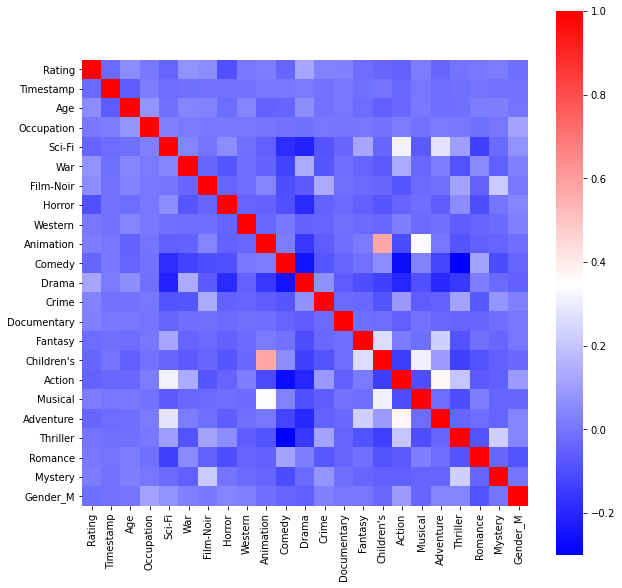

In [43]:
plt.figure(figsize=(10,10))
sns.heatmap(master_data.corr(),cmap="bwr",square=True)

In [44]:
import statsmodels.formula.api as smf

In [45]:
master_data_5=smf.ols(formula="Rating~Timestamp+Age+Occupation+Gender_M",data=master_data).fit()
print(master_data_5.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1053.
Date:                Wed, 26 Jan 2022   Prob (F-statistic):               0.00
Time:                        09:42:42   Log-Likelihood:            -1.5279e+06
No. Observations:             1000209   AIC:                         3.056e+06
Df Residuals:                 1000204   BIC:                         3.056e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.5587      0.090     62.008      0.0

In [46]:
master_data.head(4).T

,0,1,2,3
Rating,5,5,4,4
Timestamp,978300760,978298413,978220179,978199279
Age,1,56,25,25
Occupation,10,16,12,7
Sci-Fi,0,0,0,0
War,0,0,0,0
Film-Noir,0,0,0,0
Horror,0,0,0,0
Western,0,0,0,0
Animation,0,0,0,0


## MODEL BUILDING

In [47]:
x=master_data.drop(columns="Rating",axis=1)
y=master_data["Rating"]

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=25)

In [49]:
x_train.shape

(800167, 22)

In [50]:
x_test.shape

(200042, 22)

### STANDARDISATION/SCALING

In [51]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

### LOGISTIC REGRESSION

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [54]:
model.predict_proba(x_train)

array([[0.05468529, 0.12289406, 0.26350604, 0.35789471, 0.2010199 ],
       [0.10538967, 0.16941416, 0.30457459, 0.27732323, 0.14329835],
       [0.13259207, 0.159894  , 0.27187549, 0.27437287, 0.16126557],
       ...,
       [0.0479278 , 0.13152171, 0.31961362, 0.34960982, 0.15132705],
       [0.02948722, 0.08131638, 0.2353591 , 0.38385763, 0.26997967],
       [0.06814948, 0.13146519, 0.28942317, 0.31600928, 0.19495288]])

In [55]:
pred=model.predict(x_train)
pred

array([4, 3, 4, ..., 4, 4, 4], dtype=int64)

In [56]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [57]:
confusion_matrix(y_pred=pred, y_true=y_train)

array([[     0,      0,   5178,  38955,    684],
       [     0,      0,   7209,  77142,   1659],
       [     1,      0,  13081, 189970,   6058],
       [     4,      0,  12313, 255007,  11835],
       [     1,      0,   6262, 162757,  12051]], dtype=int64)

In [58]:
accuracy_score(y_pred=pred, y_true=y_train)

0.35010066648587107

In [59]:
precision_score(y_pred=pred, y_true=y_train,average="weighted")

0.2849893229810607

In [60]:
precision_score(y_pred=pred, y_true=y_train,average="micro")

0.35010066648587107

In [61]:
precision_score(y_pred=pred, y_true=y_train,average="macro")

0.2045106494178543

In [62]:
precision_score(y_pred=pred, y_true=y_train,average=None)

array([0.        , 0.        , 0.2970052 , 0.35230185, 0.3732462 ])

In [63]:
recall_score(y_pred=pred, y_true=y_train,average="micro")

0.35010066648587107

In [64]:
f1_score(y_pred=pred,y_true=y_train,average="micro")

0.35010066648587107

### DECISION TREE

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [67]:
y_tree_pred = dtree.predict(x_test)

In [68]:
accuracy_score(y_pred = y_tree_pred, y_true = y_test)

0.34944661621059575

### From the above classification models,i got 35% accuracy.

#                                         THANK YOU